<a href="https://colab.research.google.com/github/Ayushsaini04032003/stockmarketpriceprediction/blob/main/stockmarketprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 1.6 MB/s eta 0:00:00
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import math
import os
import pandas_datareader.data as web
import numpy as np
import datetime as dt
import pandas as pd
from tensorflow import keras 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519280
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726290
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838935
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.316833
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.485809
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.389572


In [ ]:
df.shape

(2003, 6)

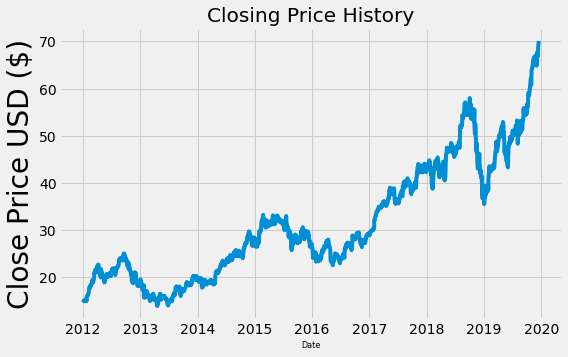

In [ ]:
# visualise the closing price history
plt.figure(figsize=(8,5))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=8)
plt.ylabel('Close Price USD ($)',fontsize=28)
plt.show()

In [ ]:
# create a new dataframe
data = df.filter(['Close'])
#convert the dataframe to a numpy array 
dataset=data.values     # values() is an inbuilt method in Python programming language that returns a view object. The view object contains the values of the dictionary, as a list
#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)

training_data_len

1603

In [ ]:
#Scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create the training dataset 
#create the scaled training dataset
train_data=scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#convert the x_train and y_train to numpy  arrays
x_train, y_train =np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [ ]:
from keras.layers import Dense,LSTM

In [ ]:
#build the LSTM model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 51s 30ms/step - loss: 0.0011


In [ ]:
#create the testing dataset
#create a new array containing values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test =[]
y_test=dataset[training_data_len:, :]
for i in range(60 ,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#convert the data to a numpy array 
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 19ms/step


In [ ]:
#get the root mean squared error(RMSE)
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

1.5633604397783336

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


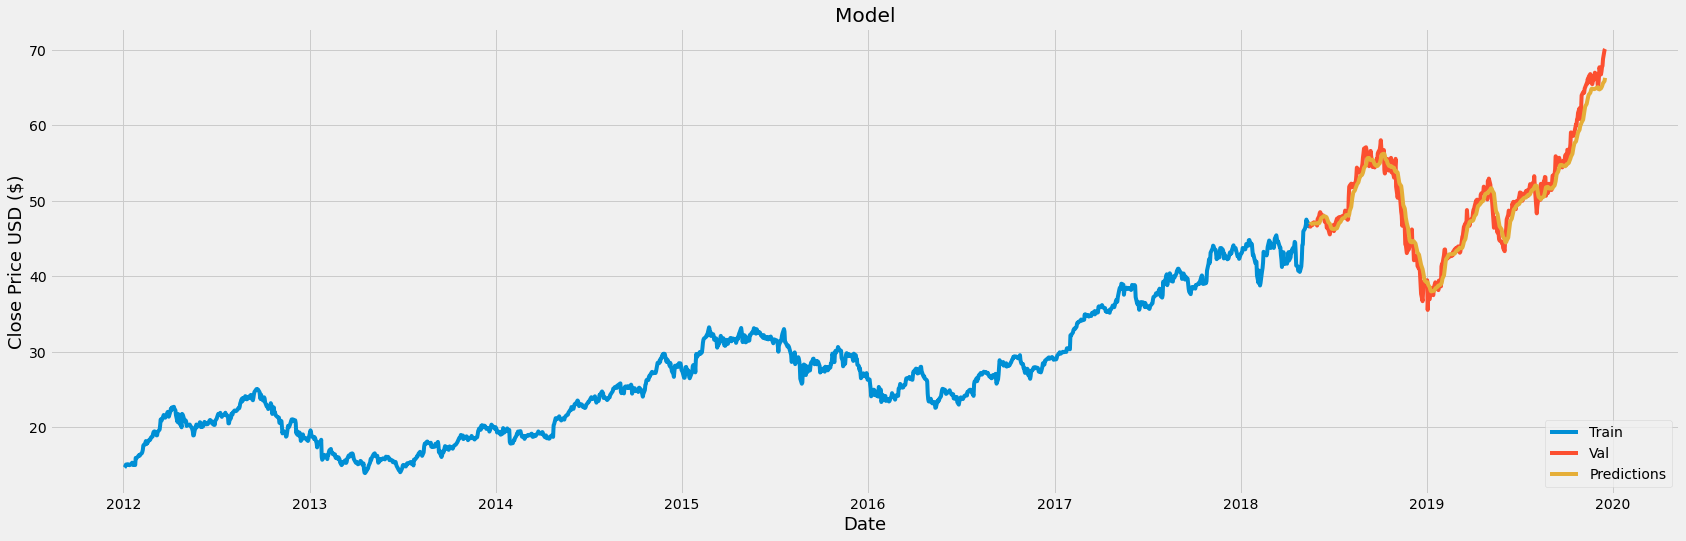

In [ ]:
#plot the data
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(26,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' ,fontsize=18 )
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,46.837284
2018-05-18,46.577499,46.938343
2018-05-21,46.907501,46.964725
2018-05-22,46.790001,46.978565
2018-05-23,47.090000,46.970932
...,...,...
2019-12-11,67.692497,65.148903
2019-12-12,67.864998,65.345146
2019-12-13,68.787498,65.562012


In [ ]:
from typing import ValuesView
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-18')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing prie values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to br values between 0 and 1
last_60_days_scaled =scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 24ms/step
[[67.120415]]


In [ ]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
